In [ ]:
import numpy as np
import pandas as pd
import sys
import matplotlib_inline
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/pranabendra/local-binary-pattern.git

Cloning into 'local-binary-pattern'...
remote: Enumerating objects: 42, done.
remote: Total 42 (delta 0), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (42/42), done.


In [ ]:
master_lbp_all = []
master_lbp_uniform = []

for x in arr:
    mat = []
    
    for i in range((window_size - 1)//2 , len(x) - (window_size - 1)//2):
        a = x[i - (window_size - 1)//2 : i]
        b = x[i+1 : i + (window_size + 1)//2]
        a = np.concatenate((a,b))
        bit_char = ['1' if k >= x[i] else '0' for k in a]
        bit_str = ''.join(bit_char)
        mat.append(int(bit_str, 2))
        m = []
    
    for i in range(pow(2,window_size - 1)):
        m.append(mat.count(i))
    
    no_of_features, ref = generate(window_size - 1)
    
    lut = {}
    for i in range(len(ref)):
        lut[ref[i]] = i+1
        
        lbp_uniform = [0]*(len(ref) + 2)

    for i in range(len(mat)):
        try:
            dummy = lut[mat[i]]
        except KeyError:
            lbp_uniform[len(ref) + 1] += 1
        else:
            lbp_uniform[dummy] += 1
    
    lbp_uniform = lbp_uniform[1:]
    master_lbp_all += [mat]
    master_lbp_uniform += [lbp_uniform]
    
y1 = np.array(master_lbp_all)
y2 = np.array(master_lbp_uniform)

y1 = y1.reshape(arr.shape[0],len(x) - window_size + 1)
y2 = y2.reshape(arr.shape[0],len(ref) + 1)

df1 = pd.DataFrame(y1)
filepath = filename[:filename.index('.')] + '_LBP_all_' + str(window_size) + filename[filename.index('.'):]
df1.to_excel(filepath, header=False, index=False)

df2 = pd.DataFrame(y2)
filepath = filename[:filename.index('.')] + '_LBP_uniform_' + str(window_size) + filename[filename.index('.'):]
df2.to_excel(filepath, header=False,index=False)

In [ ]:
def generate(window_size):
    def count_transition(num, window_size):
        d = ('{0:0'+str(window_size)+'b}').format(num)
        #print(d)
        b = num >> 1
        k = d[0] + ('{0:0'+str(window_size - 1)+'b}').format(b)
        #print(k)
        e = int(k,2)
        c = num ^ e
        #print(bin(c))
        return ('{0:0'+str(window_size)+'b}').format(c).count('1');

    count = 0
    ref = []
    for i in range(2**window_size):
        if count_transition(i, window_size) <= 2:
            count += 1
            ref.append(i)
            #print(i)
    #print(count)
    assert(count == len(ref))

    return count, ref;

In [ ]:
filename_healthy ='/content/local-binary-pattern/data/Healthy_windowed.xlsx'
filename_als='/content/local-binary-pattern/data/ALS_windowed.xlsx'
filename_myopathy='/content/local-binary-pattern/data/Myopathy_windowed.xlsx'
window_size=9
healty = pd.read_excel(filename_healthy, header=None)
als=pd.read_excel(filename_als, header=None)
myopathy=pd.read_excel(filename_myopathy, header=None)
arr_healthy= healty.values
arr_als= als.values
arr_myopathy= myopathy.values

In [ ]:
master_lbp_all = []
master_lbp_uniform = []

for x in arr_healthy:
    mat = []
    
    for i in range((window_size - 1)//2 , len(x) - (window_size - 1)//2):
        a = x[i - (window_size - 1)//2 : i]
        b = x[i+1 : i + (window_size + 1)//2]
        a = np.concatenate((a,b))
        bit_char = ['1' if k >= x[i] else '0' for k in a]
        bit_str = ''.join(bit_char)
        mat.append(int(bit_str, 2))
        m = []
    
    for i in range(pow(2,window_size - 1)):
        m.append(mat.count(i))
    
    no_of_features, ref = generate(window_size - 1)
    
    lut = {}
    for i in range(len(ref)):
        lut[ref[i]] = i+1
        
        lbp_uniform = [0]*(len(ref) + 2)

    for i in range(len(mat)):
        try:
            dummy = lut[mat[i]]
        except KeyError:
            lbp_uniform[len(ref) + 1] += 1
        else:
            lbp_uniform[dummy] += 1
    
    lbp_uniform = lbp_uniform[1:]
    master_lbp_all += [mat]
    master_lbp_uniform += [lbp_uniform]
    
y1 = np.array(master_lbp_all)
y1 = y1.reshape(arr_healthy.shape[0],len(x) - window_size + 1)
df1 = pd.DataFrame(y1)
filepath = filename_healthy[:filename_healthy.index('.')] + '_LBP_all_' + str(window_size) + filename_healthy[filename_healthy.index('.'):]
df1.to_excel(filepath, header=False, index=False)

In [ ]:
master_lbp_all = []
master_lbp_uniform = []

for x in arr_als:
    mat = []
    
    for i in range((window_size - 1)//2 , len(x) - (window_size - 1)//2):
        a = x[i - (window_size - 1)//2 : i]
        b = x[i+1 : i + (window_size + 1)//2]
        a = np.concatenate((a,b))
        bit_char = ['1' if k >= x[i] else '0' for k in a]
        bit_str = ''.join(bit_char)
        mat.append(int(bit_str, 2))
        m = []
    
    for i in range(pow(2,window_size - 1)):
        m.append(mat.count(i))
    
    no_of_features, ref = generate(window_size - 1)
    
    lut = {}
    for i in range(len(ref)):
        lut[ref[i]] = i+1
        
        lbp_uniform = [0]*(len(ref) + 2)

    for i in range(len(mat)):
        try:
            dummy = lut[mat[i]]
        except KeyError:
            lbp_uniform[len(ref) + 1] += 1
        else:
            lbp_uniform[dummy] += 1
    
    lbp_uniform = lbp_uniform[1:]
    master_lbp_all += [mat]
    master_lbp_uniform += [lbp_uniform]
    
y1 = np.array(master_lbp_all)
y1 = y1.reshape(arr_als.shape[0],len(x) - window_size + 1)
df1 = pd.DataFrame(y1)
filepath = filename_als[:filename_als.index('.')] + '_LBP_all_' + str(window_size) + filename_als[filename_als.index('.'):]
df1.to_excel(filepath, header=False, index=False)

In [ ]:
master_lbp_all = []
master_lbp_uniform = []

for x in arr_myopathy:
    mat = []
    
    for i in range((window_size - 1)//2 , len(x) - (window_size - 1)//2):
        a = x[i - (window_size - 1)//2 : i]
        b = x[i+1 : i + (window_size + 1)//2]
        a = np.concatenate((a,b))
        bit_char = ['1' if k >= x[i] else '0' for k in a]
        bit_str = ''.join(bit_char)
        mat.append(int(bit_str, 2))
        m = []
    
    for i in range(pow(2,window_size - 1)):
        m.append(mat.count(i))
    
    no_of_features, ref = generate(window_size - 1)
    
    lut = {}
    for i in range(len(ref)):
        lut[ref[i]] = i+1
        
        lbp_uniform = [0]*(len(ref) + 2)

    for i in range(len(mat)):
        try:
            dummy = lut[mat[i]]
        except KeyError:
            lbp_uniform[len(ref) + 1] += 1
        else:
            lbp_uniform[dummy] += 1
    
    lbp_uniform = lbp_uniform[1:]
    master_lbp_all += [mat]
    master_lbp_uniform += [lbp_uniform]
    
y1 = np.array(master_lbp_all)
y1 = y1.reshape(arr_myopathy.shape[0],len(x) - window_size + 1)
df1 = pd.DataFrame(y1)
filepath = filename_myopathy[:filename_myopathy.index('.')] + '_LBP_all_' + str(window_size) + filename_myopathy[filename_myopathy.index('.'):]
df1.to_excel(filepath, header=False, index=False)

In [ ]:
lbp_als=pd.read_excel('/content/local-binary-pattern/data/ALS_windowed_LBP_all_9.xlsx',header=None)
lbp_healthy=pd.read_excel('/content/local-binary-pattern/data/Healthy_windowed_LBP_all_9.xlsx',header=None)
lbp_myopathy=pd.read_excel('/content/local-binary-pattern/data/Myopathy_windowed_LBP_all_9.xlsx',header=None)

In [ ]:
y_als=np.zeros((1,150))
y_als=pd.DataFrame(y_als.T)
y_healthy=np.ones((1,150))
y_healthy=pd.DataFrame(y_healthy.T)

In [ ]:
fr1=[lbp_als,lbp_healthy]
fr2=[y_als,y_healthy]
X=pd.concat(fr1)
y=pd.concat(fr2)

In [ ]:
y

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,1.0
146,1.0
147,1.0
148,1.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X, y)
scores = []
for k, (train, test) in enumerate(kfold):
    clf.fit(X.iloc[train, :], y.iloc[train])
    score = clf.score(X.iloc[test, :], y.iloc[test])
    scores.append(score)
    #print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin



Cross-Validation accuracy: 0.573 +/- 0.057


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4888888888888889


EMG Sinyal Sınıflandırma Sonuçları (2020-Neuromuscular Disease Detection Employing 1DLocal Binary Pattern of Electromyography Signals)

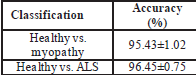

In [ ]:
lbp_als

,0,1,2,3,4,5,6,7,8,9,...,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087
0,245,251,135,255,15,14,0,19,55,255,...,240,240,240,240,248,224,240,240,255,231
1,15,15,15,15,15,15,15,15,15,15,...,12,9,2,255,237,0,147,127,111,137
2,191,111,194,159,47,3,159,47,15,7,...,255,1,91,39,127,0,16,48,113,247
3,251,161,255,167,94,12,8,16,255,238,...,141,9,3,127,111,15,2,21,59,5
4,255,43,7,191,12,8,0,117,255,195,...,253,232,192,252,96,208,248,224,240,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,221,160,85,251,68,253,0,84,250,64,...,239,207,133,31,6,93,0,16,251,97
146,2,63,43,2,188,41,3,247,255,76,...,15,15,3,23,63,15,15,15,15,15
147,15,15,15,15,7,31,7,31,15,7,...,240,240,240,240,240,240,240,243,255,239
148,15,15,15,15,15,15,15,15,15,15,...,240,240,240,240,240,240,240,240,248,224


In [ ]:
f=np.zeros((150,256))
col=[]
for i in range(256):
  col.append('{}'.format(i))
#256 uzunluğunda kolon oluşturduk  
lbp_als_df=pd.DataFrame(f,columns=col,dtype=int)
lbp_als_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
f=np.zeros((150,256))
col=[]
for i in range(256):
  col.append('{}'.format(i))
#256 uzunluğunda kolon oluşturduk  
lbp_healthy_df=pd.DataFrame(f,columns=col,dtype=int)
lbp_healthy_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
(unique, counts) = np.unique(lbp_als.values[0], return_counts=True)
frequencies = np.asarray((unique, counts))

In [ ]:
lbp_als_df.values[0]

array([233,  48,  35,  45,  23,  19,  18,  91,  37,  14,  13,  36,   8,
        20,  20, 376,  33,   7,   9,   8,  11,   2,   8,  20,   5,   3,
         6,  11,   3,   7,   7,  98,  33,   5,   7,   5,   6,   8,   8,
        10,   5,   2,   4,   4,   2,   6,   3,  33,  25,   3,   2,   8,
         2,   4,   1,   7,   4,   3,   2,   8,   6,   5,   4,  53,  30,
         6,   6,   5,   3,   4,   6,   4,   8,   3,   4,   4,   3,  20,
         2,  20,  11,   3,   2,   6,   3,   2,   1,   6,   4,   3,   1,
         6,   3,   4,   2,  20,  14,   4,   1,   3,   6,   2,   3,   3,
         7,   1,   5,   4,   2,   3,   5,  19,  14,   4,   1,   5,   4,
         2,   2,  11,  14,   1,   7,   6,   6,  10,  15,  45,  48,   9,
         9,   6,   5,   1,   3,  11,  14,   2,   2,   7,   3,   4,   3,
        11,  14,   5,   4,   7,   3,   5,   5,   7,   3,   1,   1,   6,
         2,   2,   5,  11,  28,   5,   3,   4,   9,   2,   1,   5,   5,
         4,  17,   5,   5,   5,   4,  17,  19,   1,   2,   1,   

In [ ]:
frequencies

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  90,  91,  92,  93,
         94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
        107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
        120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 182

In [ ]:
a=0
for i in lbp_als.values:
  (unique, counts) = np.unique(i, return_counts=True)
  frequencies = np.asarray((unique, counts))
  b=0
  for j in frequencies[0]:
    lbp_als_df['{}'.format(j)][a]=frequencies[1][b]
    b=b+1
  a=a+1  

In [ ]:
lbp_als_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,233,48,35,45,23,19,18,91,37,14,...,12,31,80,17,24,39,45,37,36,265
1,220,43,35,61,27,22,19,96,41,19,...,8,35,99,8,14,29,41,27,34,233
2,212,51,28,44,24,27,13,94,27,18,...,21,30,115,16,14,38,49,32,41,235
3,202,31,21,50,30,18,12,115,31,17,...,18,37,109,7,20,25,52,13,38,218
4,254,47,36,57,32,23,11,95,38,16,...,11,31,102,15,27,29,53,35,40,263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,236,44,32,51,35,17,28,86,46,19,...,7,45,85,19,10,32,33,28,40,258
146,247,57,46,61,36,25,16,91,45,12,...,11,45,72,9,28,26,47,34,39,266
147,279,64,30,48,35,31,17,68,50,23,...,15,46,63,13,10,26,52,32,41,296
148,292,48,37,37,42,15,14,69,50,17,...,24,45,65,17,13,34,41,41,54,313


In [ ]:
a=0
for i in lbp_healthy.values:
  (unique, counts) = np.unique(i, return_counts=True)
  frequencies = np.asarray((unique, counts))
  b=0
  for j in frequencies[0]:
    lbp_healthy_df['{}'.format(j)][a]=frequencies[1][b]
    b=b+1
  a=a+1  

In [ ]:
lbp_healthy_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,289,27,39,31,33,15,18,47,39,16,...,27,50,118,22,19,44,55,52,64,297
1,270,35,32,33,37,7,14,43,31,14,...,19,45,116,24,26,35,47,47,58,292
2,270,51,38,34,28,17,12,67,43,14,...,22,42,95,20,22,37,58,39,56,290
3,273,32,22,43,29,17,16,59,50,11,...,22,41,113,22,23,37,70,45,55,297
4,264,53,30,32,38,19,19,72,40,14,...,25,60,111,19,18,35,54,46,40,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,346,51,31,32,37,15,11,38,59,15,...,17,66,63,17,26,45,47,42,68,362
146,336,44,46,34,31,13,13,50,54,21,...,24,62,66,25,23,41,45,52,56,366
147,331,47,34,25,31,16,19,39,57,20,...,27,69,67,19,13,34,53,35,52,360
148,350,39,48,29,37,12,19,39,53,19,...,15,61,59,19,15,51,49,42,65,360


In [ ]:
x=[lbp_als_df,lbp_healthy_df]
X=pd.concat(x)
X

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,233,48,35,45,23,19,18,91,37,14,...,12,31,80,17,24,39,45,37,36,265
1,220,43,35,61,27,22,19,96,41,19,...,8,35,99,8,14,29,41,27,34,233
2,212,51,28,44,24,27,13,94,27,18,...,21,30,115,16,14,38,49,32,41,235
3,202,31,21,50,30,18,12,115,31,17,...,18,37,109,7,20,25,52,13,38,218
4,254,47,36,57,32,23,11,95,38,16,...,11,31,102,15,27,29,53,35,40,263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,346,51,31,32,37,15,11,38,59,15,...,17,66,63,17,26,45,47,42,68,362
146,336,44,46,34,31,13,13,50,54,21,...,24,62,66,25,23,41,45,52,56,366
147,331,47,34,25,31,16,19,39,57,20,...,27,69,67,19,13,34,53,35,52,360
148,350,39,48,29,37,12,19,39,53,19,...,15,61,59,19,15,51,49,42,65,360


In [ ]:
fr2=[y_als,y_healthy]
y=pd.concat(fr2)

In [ ]:
y

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,1.0
146,1.0
147,1.0
148,1.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X, y)
scores = []
for k, (train, test) in enumerate(kfold):
    clf.fit(X.iloc[train, :], y.iloc[train])
    score = clf.score(X.iloc[test, :], y.iloc[test])
    scores.append(score)
    #print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin



Cross-Validation accuracy: 0.827 +/- 0.196


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import pandas as pd

In [ ]:
lbp_healthy=pd.read_excel('/content/Healthy_windowed_LBP_all_9.xlsx',header=None)
lbp_myopathy=pd.read_excel('/content/Myopathy_windowed_LBP_all_9.xlsx',header=None)

In [ ]:
f=np.zeros((150,256))
col=[]
for i in range(256):
  col.append('{}'.format(i))
#256 uzunluğunda kolon oluşturduk  
lbp_healthy_df=pd.DataFrame(f,columns=col,dtype=int)
lbp_healthy_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
f=np.zeros((150,256))
col=[]
for i in range(256):
  col.append('{}'.format(i))
#256 uzunluğunda kolon oluşturduk  
lbp_myopathy_df=pd.DataFrame(f,columns=col,dtype=int)
lbp_myopathy_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
a=0
for i in lbp_myopathy.values:
  (unique, counts) = np.unique(i, return_counts=True)
  frequencies = np.asarray((unique, counts))
  b=0
  for j in frequencies[0]:
    lbp_myopathy_df['{}'.format(j)][a]=frequencies[1][b]
    b=b+1
  a=a+1 

In [ ]:
a=0
for i in lbp_healthy.values:
  (unique, counts) = np.unique(i, return_counts=True)
  frequencies = np.asarray((unique, counts))
  b=0
  for j in frequencies[0]:
    lbp_healthy_df['{}'.format(j)][a]=frequencies[1][b]
    b=b+1
  a=a+1 

In [ ]:
lbp_healthy_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,289,27,39,31,33,15,18,47,39,16,...,27,50,118,22,19,44,55,52,64,297
1,270,35,32,33,37,7,14,43,31,14,...,19,45,116,24,26,35,47,47,58,292
2,270,51,38,34,28,17,12,67,43,14,...,22,42,95,20,22,37,58,39,56,290
3,273,32,22,43,29,17,16,59,50,11,...,22,41,113,22,23,37,70,45,55,297
4,264,53,30,32,38,19,19,72,40,14,...,25,60,111,19,18,35,54,46,40,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,346,51,31,32,37,15,11,38,59,15,...,17,66,63,17,26,45,47,42,68,362
146,336,44,46,34,31,13,13,50,54,21,...,24,62,66,25,23,41,45,52,56,366
147,331,47,34,25,31,16,19,39,57,20,...,27,69,67,19,13,34,53,35,52,360
148,350,39,48,29,37,12,19,39,53,19,...,15,61,59,19,15,51,49,42,65,360


In [ ]:
lbp_myopathy_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,213,42,36,39,17,14,16,89,39,18,...,11,39,123,17,24,24,54,32,68,229
1,246,42,37,45,19,29,19,78,45,18,...,18,35,95,22,22,24,53,24,49,259
2,250,38,40,35,26,23,15,76,44,11,...,19,50,120,14,27,34,64,36,59,286
3,239,41,20,37,27,17,17,78,51,8,...,19,44,113,18,28,25,60,29,67,249
4,248,43,24,39,33,16,17,74,47,12,...,12,46,99,23,19,32,59,32,48,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,300,49,24,38,27,15,15,64,67,11,...,16,72,99,20,25,37,55,38,65,320
146,313,55,36,41,31,13,14,67,54,31,...,28,61,70,24,18,36,52,48,60,324
147,242,43,28,35,26,16,18,102,49,11,...,19,39,116,22,23,32,71,39,48,268
148,246,35,17,50,30,24,17,80,51,12,...,24,52,118,19,19,35,60,22,43,261


In [ ]:
x=[lbp_myopathy_df,lbp_healthy_df]
X=pd.concat(x)
X

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,213,42,36,39,17,14,16,89,39,18,...,11,39,123,17,24,24,54,32,68,229
1,246,42,37,45,19,29,19,78,45,18,...,18,35,95,22,22,24,53,24,49,259
2,250,38,40,35,26,23,15,76,44,11,...,19,50,120,14,27,34,64,36,59,286
3,239,41,20,37,27,17,17,78,51,8,...,19,44,113,18,28,25,60,29,67,249
4,248,43,24,39,33,16,17,74,47,12,...,12,46,99,23,19,32,59,32,48,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,346,51,31,32,37,15,11,38,59,15,...,17,66,63,17,26,45,47,42,68,362
146,336,44,46,34,31,13,13,50,54,21,...,24,62,66,25,23,41,45,52,56,366
147,331,47,34,25,31,16,19,39,57,20,...,27,69,67,19,13,34,53,35,52,360
148,350,39,48,29,37,12,19,39,53,19,...,15,61,59,19,15,51,49,42,65,360


In [ ]:
y_myopathy=np.zeros((1,150))
y_myopathy=pd.DataFrame(y_myopathy.T,dtype=int)
y_healthy=np.ones((1,150))
y_healthy=pd.DataFrame(y_healthy.T,dtype=int)

In [ ]:
fr=[y_healthy,y_myopathy]
y=pd.concat(fr)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X, y)
scores = []
for k, (train, test) in enumerate(kfold):
    clf.fit(X.iloc[train, :], y.iloc[train])
    score = clf.score(X.iloc[test, :], y.iloc[test])
    scores.append(score)
    #print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin



Cross-Validation accuracy: 0.757 +/- 0.157


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8777777777777778


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
